In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

In [2]:
df0 = []
df0.append(pd.read_csv('HIST_PAINEL_COVIDBR_2020_Parte1_13jun2021.csv', sep = ';')) #25/fev/2020 - 31/jul/2020
df0.append(pd.read_csv('HIST_PAINEL_COVIDBR_2020_Parte2_13jun2021.csv', sep = ';')) #01/ago/2020 - 31/dez/2020
df0.append(pd.read_csv('HIST_PAINEL_COVIDBR_Parte3_13jun2021.csv'     , sep = ';')) #01/jan/2021 - 13/jun/2021

In [3]:
covid_l = []
covid = df0[0][df0[0].regiao == 'Brasil'][['regiao', 'data','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos']].copy()

for i,df in enumerate(df0):
    covid_l.append(df[df.regiao == 'Brasil'][['regiao', 'data','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos']].copy())
    if i == 0:
        continue
    covid = pd.concat([covid,df[df.regiao == 'Brasil'][['regiao', 'data','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos']].copy()])
    

In [4]:
covid = covid.sort_values(by='data').reset_index(drop=True)

In [5]:
covid['indice'] = list(covid.index)

In [6]:
covid

,regiao,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,indice
0,Brasil,2020-02-25,0.0,0,0,0,0
1,Brasil,2020-02-26,1.0,1,0,0,1
2,Brasil,2020-02-27,1.0,0,0,0,2
3,Brasil,2020-02-28,1.0,0,0,0,3
4,Brasil,2020-02-29,2.0,1,0,0,4
...,...,...,...,...,...,...,...
472,Brasil,2021-06-09,17122877.0,85748,479515,2723,472
473,Brasil,2021-06-10,17210969.0,88092,482019,2504,473
474,Brasil,2021-06-11,17296118.0,85149,484235,2216,474
475,Brasil,2021-06-12,17374818.0,78700,486272,2037,475


In [7]:
def mm(dias,data,i):
    data = data.iloc[i-dias:i]
    return data.obitosNovos.mean()

In [8]:
covid['media_movel_14'] = covid.apply(lambda x: mm(14,covid,x.indice), axis = 1)
covid = covid.drop(columns='indice')
covid

,regiao,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,media_movel_14
0,Brasil,2020-02-25,0.0,0,0,0,NaN
1,Brasil,2020-02-26,1.0,1,0,0,NaN
2,Brasil,2020-02-27,1.0,0,0,0,NaN
3,Brasil,2020-02-28,1.0,0,0,0,NaN
4,Brasil,2020-02-29,2.0,1,0,0,NaN
...,...,...,...,...,...,...,...
472,Brasil,2021-06-09,17122877.0,85748,479515,2723,1768.642857
473,Brasil,2021-06-10,17210969.0,88092,482019,2504,1791.857143
474,Brasil,2021-06-11,17296118.0,85149,484235,2216,1810.357143
475,Brasil,2021-06-12,17374818.0,78700,486272,2037,1799.285714


In [1]:
covid.to_csv('covid16.csv', index = False)

NameError: name 'covid' is not defined

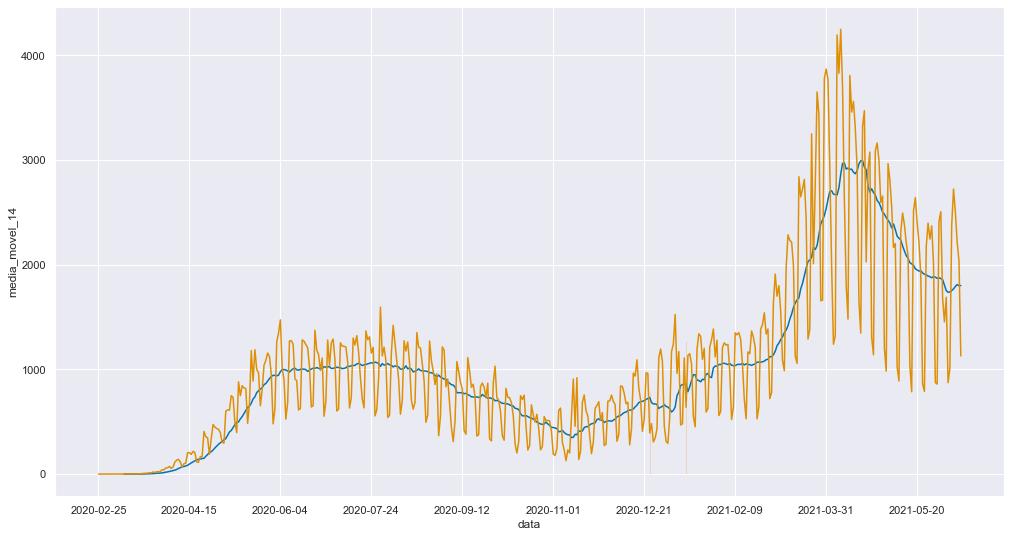

In [12]:
sns.set(rc={'figure.figsize':(17,9)})
sns.set_palette('colorblind')
loc = plticker.MultipleLocator(base=50.0)
axes = sns.lineplot( data=covid, x='data', y='media_movel_14')
axes = sns.lineplot( data = covid, x= 'data', y = 'obitosNovos')
axes.xaxis.set_major_locator(loc)